## Economic Analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
#color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

fred_key = '69c97f680be2831a13807e48bfd98655'

In [15]:
!pip install fredapi > /dev/null

The system cannot find the path specified.


In [16]:
!pip install fredapi



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Create the Fred Object

In [17]:
fred = Fred(api_key=fred_key)
fred

# 2. Search for Economic Data

In [18]:
fred_search = fred.search('S&P')

In [19]:
fred_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2024-09-30,2024-09-30,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:50:02-05:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2024-09-30,2024-09-30,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-09-25 10:50:04-05:00,78,"For more information regarding the index, plea..."
SP500,SP500,2024-09-30,2024-09-30,S&P 500,2014-09-29,2024-09-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-27 19:16:31-05:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2024-09-30,2024-09-30,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-09-25 10:55:01-05:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2024-09-30,2024-09-30,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:55:38-05:00,33,"For more information regarding the index, plea..."


# 3. Pull Raw Data and Plot

In [20]:
sp500 = fred.get_series('SP500')

<AxesSubplot: title={'center': 'S&P 500'}>

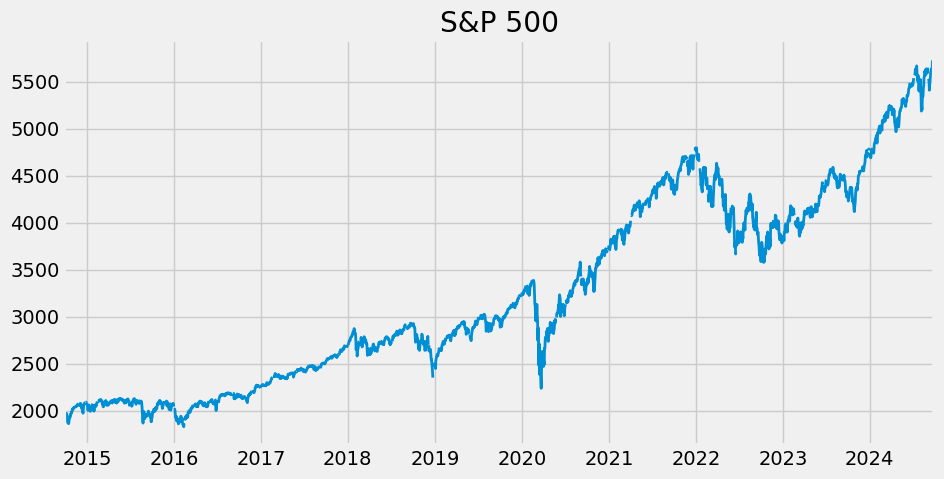

In [21]:
sp500.plot(figsize=(10,5), title = 'S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [22]:
unempl_results = fred.search('unemployment')

In [23]:
unempl_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-30,2024-09-30,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-30,2024-09-30,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-30,2024-09-30,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-09-30,2024-09-30,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-09-30,2024-09-30,Continued Claims (Insured Unemployment),1967-01-07,2024-09-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-09-26 07:40:04-05:00,74,"Continued claims, also referred to as insured ..."


In [24]:
# the unepmployment rate is labeled as UNRATE in the dataset. 
fred.get_series('UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
Length: 920, dtype: float64

In [27]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-30,2024-09-30,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-30,2024-09-30,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-09-30,2024-09-30,Unemployment Rate - Black or African American,1972-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:16-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-09-30,2024-09-30,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2024-09-30,2024-09-30,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2024-09-06 07:46:37-05:00,27,The series comes from the 'Current Population ...
